*Uploading the csv files using pandas and reading them.*

In [1]:
import pandas as pd 
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving summer.csv to summer.csv


In [3]:
summer_data = pd.read_csv(io.BytesIO(uploaded['summer.csv']))

In [4]:
summer_data.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [5]:
uploaded_1 = files.upload()

Saving winter.csv to winter.csv


In [6]:
winter_data = pd.read_csv(io.BytesIO(uploaded_1['winter.csv']))

In [7]:
uploaded_2 = files.upload()

Saving dictionary.csv to dictionary.csv


In [8]:
dictionary_data = pd.read_csv(io.BytesIO(uploaded_2['dictionary.csv']))

Combining summer and Winter dataset before doing the analysis

In [9]:
frames = [summer_data, winter_data]
olympic_game = pd.concat(frames)

In [10]:
olympic_game.head(3)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze


In [11]:
olympic_game.tail(3)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold
5769,2014,Sochi,Skiing,Snowboard,"TRESPEUCH, Chloe",FRA,Women,Snowboard Cross,Bronze


In [12]:
index = olympic_game.index 
number_of_records = len(index)

In [13]:
number_of_records

36935

In [14]:
olympic_game['Gender'].value_counts()

Men      26690
Women    10245
Name: Gender, dtype: int64

In [15]:
olympic_game.isna().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [16]:
olympic_game.isna().sum().sum()

4

In [17]:
olympic_game[olympic_game['Country'].isnull()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [18]:
na_count = olympic_game.isna().sum().sum()
na_country_count = na_count/ number_of_records

In [19]:
print(na_country_count)
na_country_pct = "{:.0%}".format(na_country_count)
print(na_country_pct)

0.00010829836198727494
0%


*Deleting records with NA values in Olympic Dataset*

In [20]:
olympic_data = olympic_game[olympic_game['Country'].notna()]

In [21]:
new_index = olympic_data.index 
new_olympic_number_of_records = len(new_index)

In [22]:
new_olympic_number_of_records

36931

*Finding the NA and NAN's in the dictionary dataset*

In [23]:
dictionary_data.isna().sum()

Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64

In [24]:
d_index = dictionary_data.index 
dictionary_number_of_records = len(d_index)

In [25]:
dictionary_number_of_records

201

*Deleting records with NA values in the dictionary dataset.dropna() command drops all the rows with atleast on na values*

In [26]:
dictionary_data_f = dictionary_data[dictionary_data['Population'].notna()]
dictionary_data_f = dictionary_data[dictionary_data['GDP per Capita'].notna()]

In [27]:
d_1_index = dictionary_data_f.index 
dictionary_number_of_records_1 = len(d_1_index)

In [28]:
dictionary_number_of_records_1

176

*Uploading city_country_mapping_final dataset to add a new fild of hosting country feature to the original dataset.*
**Note:The city-country mapping table was created by Authors of this assignment as per the requirment.**

In [29]:
uploaded_3 = files.upload()

Saving city_country_mapping_final.csv to city_country_mapping_final.csv


In [30]:
hosting_country_data = pd.read_csv(io.BytesIO(uploaded_3['city_country_mapping_final.csv']))

In [31]:
olympic_data_final = pd.merge(olympic_data, hosting_country_data , on = 'City', how = 'left' )
olympic_data_final.tail(2)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Hosting Country
36929,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Russia
36930,2014,Sochi,Skiing,Snowboard,"TRESPEUCH, Chloe",FRA,Women,Snowboard Cross,Bronze,Russia


*Checking if there are any records with missing values*

In [32]:
olympic_data_final.isna().sum()

Year                0
City                0
Sport               0
Discipline          0
Athlete             0
Country             0
Gender              0
Event               0
Medal               0
Hosting Country     0
dtype: int64

*No NA Values are find in new created dataset*

In [33]:
olympic_data_final[olympic_data_final.isna().any(axis =1)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Hosting Country


*Rename the some columns before merging olympic dataset and dictionary dataset* 

In [34]:
olympic_data_final.rename(columns = {'Country' : 'Code'} , inplace = True )

In [35]:
dictionary_data_f.rename(columns = {'Country' : 'Winning Country'} , inplace = True )

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [36]:
dictionary_data_f.dtypes

Winning Country     object
Code                object
Population         float64
GDP per Capita     float64
dtype: object

In [37]:
olympic_data_final

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Greece
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Greece
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...
36926,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Russia
36927,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Russia
36928,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Russia
36929,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Russia


*Replacing the Country code ANZ to AUS as Australasia(ANZ) is made up of Australia(AUS). And Australia is one of the hosting nation and discarding records of winning players from one of the hosting countrty will affect the overall result.*

In [38]:
olympic_data_final['Code'].replace({"ANZ":"AUS"}, inplace = True)

In [39]:
anz_check = olympic_data_final[olympic_data_final['Code'] == 'ANZ']

In [40]:
anz_check

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country


*Replacing all records with Code == EUA( United Team of Germany) with GER(Germany) because all the individuals representing United Teams of Germany are part of Germany as a whole.Also Germany is one of the hosting nation.*

In [41]:
olympic_data_final['Code'].replace({"EUA":"GER"}, inplace = True)

In [42]:
eua_check = olympic_data_final[olympic_data_final['Code'] == 'EUA']

In [43]:
eua_check

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country


*Replacing Country Code TCH and BOH by CZE*

In [44]:
olympic_data_final['Code'].replace({"TCH":"CZE", "BOH": "CZE"}, inplace = True)

*Replacing all records with Code == FRG(West Germany) with GER(Germany) because all the individuals representing West Germany are part of Germany as a whole.Also Germany is one of the hosting nation.*

In [45]:
olympic_data_final['Code'].replace({"FRG":"GER"}, inplace = True)

In [46]:
frg_check = olympic_data_final[olympic_data_final['Code'] == 'FRG']

In [47]:
frg_check

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country


Replacing all records with Code == GDR(East Germany) with GER(Germany) because all the individuals representing East Germany are part of Germany as a whole.Also Germany is one of the hosting nation.

In [48]:
olympic_data_final['Code'].replace({"GDR":"GER"}, inplace = True)

In [49]:
gdr_check = olympic_data_final[olympic_data_final['Code'] == 'GDR']

In [50]:
gdr_check

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country


*Replacing the country code name for Singapore. As per the International Olympic Committee(IOC).The country code is SGP. But the country code for the same country is SIN in dictionary table.*

In [51]:
olympic_data_final['Code'].replace({"SGP":"SIN"}, inplace = True)

In [52]:
sgp_check = olympic_data_final[olympic_data_final['Code'] == 'SGP']

In [53]:
sgp_check

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country


*Replacing SRB by SCG*

In [54]:
olympic_data_final['Code'].replace({"SRB":"SCG"}, inplace = True)

In [55]:
srb_check = olympic_data_final[olympic_data_final['Code'] == 'SRB']

In [56]:
srb_check

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country


In [57]:
olympic_data_final_x = pd.merge(olympic_data_final, dictionary_data_f , on = 'Code', how = 'left' )

In [58]:
olympic_data_final_x.head(5)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country,Winning Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Greece,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Greece,Austria,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,Greece,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,Greece,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,Greece,10823732.0,18002.230578


In [59]:
olympic_data_final_x.isna().sum()

Year                   0
City                   0
Sport                  0
Discipline             0
Athlete                0
Code                   0
Gender                 0
Event                  0
Medal                  0
Hosting Country        0
Winning Country     4564
Population          4564
GDP per Capita      4564
dtype: int64

In [60]:
olympic_data_final_x[olympic_data_final_x['Winning Country'].isna()]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country,Winning Country,Population,GDP per Capita
132,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Greece,NaN,NaN,NaN
133,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Greece,NaN,NaN,NaN
134,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Greece,NaN,NaN,NaN
135,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Greece,NaN,NaN,NaN
136,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Greece,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33943,1992,Albertville,Skiing,Cross Country Skiing,"VAELBE, Elena",EUN,Women,5KM,Bronze,France,NaN,NaN,NaN
33945,1992,Albertville,Skiing,Cross Country Skiing,"EGOROVA, Ljubov",EUN,Women,5KM,Silver,France,NaN,NaN,NaN
33949,1992,Albertville,Skiing,Cross Country Skiing,"VAELBE, Elena",EUN,Women,Combined 5KM + 10KM Pursuit,Bronze,France,NaN,NaN,NaN
33950,1992,Albertville,Skiing,Cross Country Skiing,"EGOROVA, Ljubov",EUN,Women,Combined 5KM + 10KM Pursuit,Gold,France,NaN,NaN,NaN


*Note: Code ZZX represents Mixed Team. Mixed Team don't represent any country. Therefore the records containing ZZX as the code value don't have any vallue under GDP and Population Attribute*

In [61]:
#Get names of indexes for which column Code has value ZZX
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'ZZX'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

In [62]:
olympic_data_final_x.isna().sum()

Year                   0
City                   0
Sport                  0
Discipline             0
Athlete                0
Code                   0
Gender                 0
Event                  0
Medal                  0
Hosting Country        0
Winning Country     4516
Population          4516
GDP per Capita      4516
dtype: int64

*The records of winners from CUBA are deleted because their GDP per capita information is not available in the records*

In [63]:
olympic_data_final_x.drop(olympic_data_final_x[olympic_data_final_x['Code'] == 'CUB' ].index , inplace = True)

In [64]:
olympic_data_final_x.isna().sum()

Year                   0
City                   0
Sport                  0
Discipline             0
Athlete                0
Code                   0
Gender                 0
Event                  0
Medal                  0
Hosting Country        0
Winning Country     4106
Population          4106
GDP per Capita      4106
dtype: int64

*The records of winners with county CODE == EUN are removed beause they represent of twelve of the fifteen former Soviet republics and it is onerous task to represent such records with one GDP and Population.*

In [65]:
olympic_data_final_x.drop(olympic_data_final_x[olympic_data_final_x['Code'] == 'EUN' ].index , inplace = True)

In [66]:
olympic_data_final_x.isna().sum()

Year                   0
City                   0
Sport                  0
Discipline             0
Athlete                0
Code                   0
Gender                 0
Event                  0
Medal                  0
Hosting Country        0
Winning Country     3823
Population          3823
GDP per Capita      3823
dtype: int64

*Deleting all the records with Code == YUG as no GDP and Populaton information is available for such records*

In [67]:
#Get names of indexes for which column Code has value YUG
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'YUG'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

In [68]:
olympic_data_final_x.isna().sum()

Year                   0
City                   0
Sport                  0
Discipline             0
Athlete                0
Code                   0
Gender                 0
Event                  0
Medal                  0
Hosting Country        0
Winning Country     3381
Population          3381
GDP per Capita      3381
dtype: int64

*Deleting all the records with Code == PRK as no GDP and Populaton information is available for such records*

In [69]:
#Get names of indexes for which column Code has value PRK
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'PRK'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

In [70]:
vars_with_na = [var for var in olympic_data_final_x.columns if olympic_data_final_x[var].isnull().sum() > 0]

In [71]:
print (vars_with_na)

['Winning Country', 'Population', 'GDP per Capita']


*Deleting all the records with Code == URS as no GDP and Populaton information is available for such records.It is not correct to replace URS(Soviet Union) with RUS (Russia) as the Soviet Union was made up of 15 different present nation(Latvia, Lithuania, and more).*

In [72]:
#Get names of indexes for which column Code has value URS
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'URS'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*Deleting all the records with Code == LIE(Liechtenstein) as no Populaton information is available for such records.There are only 9 records with country code as LIE hence deleting it will not affect the overall analysis result*

In [73]:
#Get names of indexes for which column Code has value LIE
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'LIE'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*The Russian Empire stretched across northern portions of Asia and Europe.It occupy present Russia, Ukraine, Finland and many more countries.So relacing Country Code, RU1 (Russian Empire) to RUS (Russia) will affect the overall result.Therefore deleting all the records with Code == RU1.*

In [74]:
#Get names of indexes for which column Code has value RU1
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'RU1'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*Deleting all the records with Code == ROU(Romania) as no GDP information is available for such records.*

In [75]:
#Get names of indexes for which column Code has value ROU
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'ROU'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

In [76]:
olympic_data_final_x.isna().sum()

Year                  0
City                  0
Sport                 0
Discipline            0
Athlete               0
Code                  0
Gender                0
Event                 0
Medal                 0
Hosting Country       0
Winning Country     164
Population          164
GDP per Capita      164
dtype: int64

*Deleting all the records with Code == PUR(Puerto Rico) as no GDP information is available for such records.There are only 8 records with country code PUR so deleting them will not affect the overall result*

In [77]:
#Get names of indexes for which column Code has value PUR
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'PUR'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*Deleting all the records with Code == IRI(Iran) as no GDP information is available for such records.*

In [78]:
#Get names of indexes for which column Code has value IRI
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'IRI'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*Deleting all the records with Code == VEN(Venezuela) as no GDP information is available for such records.*

In [79]:
#Get names of indexes for which column Code has value VEN
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'VEN'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*Deleting all the records with Code == TPE(Taiwan) as no Population and GDP per captia information is available for such records.*

In [80]:
#Get names of indexes for which column Code has value TPE
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'TPE'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)


*Deleting all the records with Code == MNE(Montenegro) as no Population and GDP per captia information is available for such records.*

In [81]:
#Get names of indexes for which column Code has value MNE
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'MNE'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*There were 3 shooters in 1992 Spain Olympic Games who partcipated as Independent Olympic Participants(IOP). Therefore these three records are discarded from the dataset*.

In [82]:
#Get names of indexes for which column Code has value IOP
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'IOP'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*Deleting all the records with Code == TTO(Trinidad and Tobago) as no Population and GDP per captia information is available for such records.*

In [83]:
#Get names of indexes for which column Code has value TTO
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'TTO'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)


*Deleting all the records with Code == ERI(Eritrea) as no Population and GDP per captia information is available for such records.*

In [84]:
#Get names of indexes for which column Code has value ERI
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'ERI'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*Athletes from Barbados, Jamaica, and Trinidad and Tobago competed as the British West Indies (BWI) at the 1960 Games.The West Indies Federation only existed as a nation from 1958–1962.Therefore there is no information of GDP and Population. And so 5 columns are discarded.*

In [85]:
#Get names of indexes for which column Code has value BWI
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'BWI'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

*There is only 1 record with Code == AHO(Netherlands) and Code == ISV(Virgin Islands). Therefore deleting the records*

In [86]:
#Get names of indexes for which column Code has value AHO and ISV
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'AHO'].index

#Delete these row indexes from dataFrame 
olympic_data_final_x.drop(indexNames , inplace = True)

In [87]:
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'ISV'].index
olympic_data_final_x.drop(indexNames , inplace = True)

*There is only 1 record with Code == BER(Bermuda).Deleting the record will not affect the analysis.*

In [88]:
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'BER'].index
olympic_data_final_x.drop(indexNames , inplace = True)

*Deleting all the records with Code == SYR(Syria) as no Population and GDP per captia information is available for such records*

In [89]:
indexNames = olympic_data_final_x[olympic_data_final_x['Code'] == 'SYR'].index
olympic_data_final_x.drop(indexNames , inplace = True)

In [90]:
olympic_data_final_x[olympic_data_final_x['Winning Country'].isna()]

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country,Winning Country,Population,GDP per Capita


In [91]:
olympic_data_final_x

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Hosting Country,Winning Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Greece,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Greece,Austria,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,Greece,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,Greece,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,Greece,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36926,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Russia,United Kingdom,65138232.0,43875.969614
36927,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Russia,United States,321418820.0,56115.718426
36928,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Russia,Canada,35851774.0,43248.529909
36929,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Russia,Czech Republic,10551219.0,17548.338213


*Downloading the preprocesssed dataframe as a csv file*

In [93]:
olympic_data_final_x.to_csv('preprocessed_olympic.csv')

In [94]:
from google.colab import files
files.download('preprocessed_olympic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Removing the Athlete Column from the records from the dataset as player infromation is not required for the analysis. Also removing the Athelete feature will help in easily replacing the team game rcords to one.***

In [95]:
#deleting a column from the dataframe 
del olympic_data_final_x['Athlete']

**Deduplication of values**

In [96]:
x_dup = olympic_data_final_x

In [97]:
#Finding duplicate value using the following columns. This subset will hel find duplicates based on the following features.
x_dup.duplicated(subset= ['Year','Sport','Discipline','Event','Medal'])

0        False
1        False
2        False
3        False
4        False
         ...  
36926     True
36927     True
36928     True
36929     True
36930     True
Length: 32367, dtype: bool

*False indicates number of non-duplicate rows*

In [98]:
x_dup.duplicated(subset= ['Year','Sport','Discipline','Event','Medal']).value_counts()

True     20116
False    12251
dtype: int64

In [99]:
print((~x_dup.duplicated(subset= ['Year','Sport','Discipline','Event','Medal'])).sum())

12251


*inplace =True, makes sure that the rows are removed from the original dataframe italicised text.*

In [100]:
x_dup.drop_duplicates(keep= 'last',inplace=True)

***Downloading deduplicated dataframe as a csv file***

In [101]:
x_dup.to_csv('deduplicated_olympic.csv')

In [102]:
files.download('deduplicated_olympic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [103]:
x_dup['Gender'].value_counts()

Men      11209
Women     4344
Name: Gender, dtype: int64

*List of different event and their frequency in the dataset.*

In [104]:
x_dup['Event'].value_counts()

Individual                             513
Team                                   309
Singles                                239
1500M                                  220
Doubles                                198
                                      ... 
Fixed Bird Target Large Birds Teams      1
Open Class A                             1
Class B Up To 60 Feet                    1
8M Class C                               1
10M (Rating 1919)                        1
Name: Event, Length: 733, dtype: int64

*List of different sports in the dataset with its frequency.*

In [105]:
x_dup['Sport'].value_counts()

Athletics            2493
Aquatics             1926
Skiing               1230
Wrestling             959
Skating               916
Boxing                716
Gymnastics            696
Shooting              684
Cycling               643
Rowing                633
Fencing               511
Canoe / Kayak         487
Weightlifting         465
Sailing               463
Equestrian            459
Judo                  413
Biathlon              203
Tennis                201
Archery               162
Bobsleigh             159
Luge                  126
Badminton              98
Modern Pentathlon      97
Taekwondo              92
Hockey                 90
Volleyball             86
Football               82
Table Tennis           80
Ice Hockey             74
Basketball             62
Canoe                  48
Handball               48
Curling                33
Triathlon              24
Softball               12
Tug of War             12
Golf                   11
Polo                   11
Rugby       

In [106]:
sport_count = x_dup['Sport'].value_counts()

In [107]:
sport_count.count()

48

***Adding a new field for home advantage***

In [108]:
import numpy as np
x_dup['home_advantage'] = np.where((x_dup['Hosting Country '] == x_dup['Winning Country']), 1 , 0)

In [109]:
x_dup['home_advantage'].value_counts()

0    13857
1     1696
Name: home_advantage, dtype: int64

***Creating a new column medal numeric for better analysis***

In [110]:
conditions = [ x_dup['Medal'] == 'Gold', x_dup['Medal'] == 'Silver', x_dup['Medal'] == 'Bronze']
values = [1,2,3]
x_dup['medal_numeric'] = np.select(conditions , values,0)

In [111]:
x_dup

,Year,City,Sport,Discipline,Code,Gender,Event,Medal,Hosting Country,Winning Country,Population,GDP per Capita,home_advantage,medal_numeric
0,1896,Athens,Aquatics,Swimming,HUN,Men,100M Freestyle,Gold,Greece,Hungary,9844686.0,12363.543460,0,1
1,1896,Athens,Aquatics,Swimming,AUT,Men,100M Freestyle,Silver,Greece,Austria,8611088.0,43774.985174,0,2
2,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,Greece,10823732.0,18002.230578,0,3
3,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Gold,Greece,Greece,10823732.0,18002.230578,0,1
4,1896,Athens,Aquatics,Swimming,GRE,Men,100M Freestyle For Sailors,Silver,Greece,Greece,10823732.0,18002.230578,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36926,2014,Sochi,Skiing,Snowboard,GBR,Women,Slopestyle,Bronze,Russia,United Kingdom,65138232.0,43875.969614,0,3
36927,2014,Sochi,Skiing,Snowboard,USA,Women,Slopestyle,Gold,Russia,United States,321418820.0,56115.718426,0,1
36928,2014,Sochi,Skiing,Snowboard,CAN,Women,Snowboard Cross,Silver,Russia,Canada,35851774.0,43248.529909,0,2
36929,2014,Sochi,Skiing,Snowboard,CZE,Women,Snowboard Cross,Gold,Russia,Czech Republic,10551219.0,17548.338213,0,1


***Removing all the Winning Countries records which were not a hosting country to test the model accuracy and even calculating France top ranking percentage.***

In [112]:
hosting_df = pd.DataFrame()
hosting_df = x_dup.copy()

In [113]:
map_dict = {1:"Home Advantage"}
hosting_df['Home Advant'] = hosting_df['home_advantage'].map(map_dict)

In [114]:
hosting_df = hosting_df.dropna()

In [115]:
hosting_df

,Year,City,Sport,Discipline,Code,Gender,Event,Medal,Hosting Country,Winning Country,Population,GDP per Capita,home_advantage,medal_numeric,Home Advant
167,1900,Paris,Aquatics,Swimming,FRA,Men,200M Team Swimming,Bronze,France,France,66808385.0,36205.568102,1,3,Home Advantage
177,1900,Paris,Aquatics,Swimming,FRA,Men,200M Team Swimming,Silver,France,France,66808385.0,36205.568102,1,2,Home Advantage
178,1900,Paris,Aquatics,Swimming,FRA,Men,4000M Freestyle,Bronze,France,France,66808385.0,36205.568102,1,3,Home Advantage
182,1900,Paris,Aquatics,Swimming,FRA,Men,Underwater Swimming,Gold,France,France,66808385.0,36205.568102,1,1,Home Advantage
183,1900,Paris,Aquatics,Swimming,FRA,Men,Underwater Swimming,Silver,France,France,66808385.0,36205.568102,1,2,Home Advantage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36837,2014,Sochi,Skiing,Freestyle Skiing,RUS,Men,Moguls,Bronze,Russia,Russia,144096812.0,9092.580536,1,3,Home Advantage
36901,2014,Sochi,Skiing,Snowboard,RUS,Men,Giant Parall.S.,Gold,Russia,Russia,144096812.0,9092.580536,1,1,Home Advantage
36908,2014,Sochi,Skiing,Snowboard,RUS,Men,Parallel Slalom,Gold,Russia,Russia,144096812.0,9092.580536,1,1,Home Advantage
36914,2014,Sochi,Skiing,Snowboard,RUS,Men,Snowboard Cross,Silver,Russia,Russia,144096812.0,9092.580536,1,2,Home Advantage


In [116]:
hosting_df.to_csv('winners_of_hostingcountry.csv')
files.download('winners_of_hostingcountry.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
#completely processed file
x_dup.to_csv('completely_processed.csv')
files.download('completely_processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
x_graph = x_dup[['Year','medal_numeric','home_advantage','Population', 'GDP per Capita']].copy()

In [119]:
x_graph

,Year,medal_numeric,home_advantage,Population,GDP per Capita
0,1896,1,0,9844686.0,12363.543460
1,1896,2,0,8611088.0,43774.985174
2,1896,3,0,10823732.0,18002.230578
3,1896,1,0,10823732.0,18002.230578
4,1896,2,0,10823732.0,18002.230578
...,...,...,...,...,...
36926,2014,3,0,65138232.0,43875.969614
36927,2014,1,0,321418820.0,56115.718426
36928,2014,2,0,35851774.0,43248.529909
36929,2014,1,0,10551219.0,17548.338213


***Normalizing the certain attributes for checking correlation between certain features with Min-Max Feature Scaling using scikit-learn.***

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_graph)
scaled = scaler.transform(x_graph)
scaled_df = pd.DataFrame(scaled, columns=x_graph.columns)

In [121]:
scaled_df

,Year,medal_numeric,home_advantage,Population,GDP per Capita
0,0.0,0.0,0.0,0.007103,0.119464
1,0.0,0.5,0.0,0.006203,0.429936
2,0.0,1.0,0.0,0.007817,0.175197
3,0.0,0.0,0.0,0.007817,0.175197
4,0.0,0.5,0.0,0.007817,0.175197
...,...,...,...,...,...
15548,1.0,1.0,0.0,0.047430,0.430935
15549,1.0,0.0,0.0,0.234344,0.551913
15550,1.0,0.5,0.0,0.026070,0.424733
15551,1.0,0.0,0.0,0.007618,0.170710


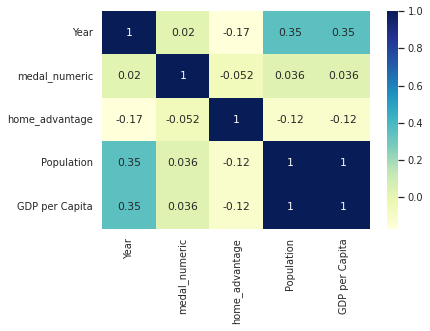

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [122]:
#Creating correlogram for analysis

import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

corr_matrix = scaled_df.apply(lambda x: x.factorize()[0]).corr()
sns.set(font_scale= 0.9)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot = True)
plt.show()
plt.savefig("correlogram.png", dpi =2400)

files.download("correlogram.png")

In [123]:
x_dup.dtypes

Year                  int64
City                 object
Sport                object
Discipline           object
Code                 object
Gender               object
Event                object
Medal                object
Hosting Country      object
Winning Country      object
Population          float64
GDP per Capita      float64
home_advantage        int64
medal_numeric         int64
dtype: object

***Using Label Encoding to encode all the categroigal variables before normalizing them.***

In [124]:
x_dup['Sport'] = x_dup['Sport'].astype('category')
x_dup['City'] = x_dup['City'].astype('category')
x_dup['Discipline'] = x_dup['Discipline'].astype('category')
x_dup['Code'] = x_dup['Code'].astype('category')
x_dup['Gender'] = x_dup['Gender'].astype('category')
x_dup['Medal'] = x_dup['Medal'].astype('category')
x_dup['Winning Country'] = x_dup['Winning Country'].astype('category')
x_dup['Hosting Country '] = x_dup['Hosting Country '].astype('category')
x_dup['Event'] = x_dup['Event'].astype('category')

In [125]:
x_dup['Sport'] = x_dup['Sport'].cat.codes
x_dup['City'] = x_dup['City'].cat.codes
x_dup['Discipline'] = x_dup['Discipline'].cat.codes
x_dup['Code'] = x_dup['Code'].cat.codes
x_dup['Gender'] = x_dup['Gender'].cat.codes
x_dup['Medal'] = x_dup['Medal'].cat.codes
x_dup['Winning Country'] = x_dup['Winning Country'].cat.codes
x_dup['Hosting Country '] = x_dup['Hosting Country '].cat.codes
x_dup['Event'] = x_dup['Event'].cat.codes

In [126]:
x_dup.to_csv('checking_the_model.csv')

In [127]:
files.download('checking_the_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Separating Traininig and Testing Dataset.***

In [128]:
from sklearn.model_selection import train_test_split

***Only, in the below case, if you run the code again with the same random_state, the output will always remain the same. It is setting a seed, which is useful for reproducibility of the results.***

In [129]:
#Shuffle is used for proper splitting of the data.It shuffles the data proper splitting.
training_dataset, testing_dataset = train_test_split(x_dup, test_size = 0.20, random_state=1 , shuffle = True)

In [130]:
testing_dataset

,Year,City,Sport,Discipline,Code,Gender,Event,Medal,Hosting Country,Winning Country,Population,GDP per Capita,home_advantage,medal_numeric
26958,2004,3,40,66,70,1,190,0,11,67,1.270172e+08,9005.024265,0,3
36221,2010,40,37,20,79,0,217,1,5,77,5.195921e+06,74400.369777,0,1
36142,2010,40,36,61,16,0,678,1,5,17,3.585177e+07,43248.529909,1,1
28905,2008,6,38,60,4,1,656,0,6,4,2.378117e+07,56310.962993,0,3
20788,1992,5,25,39,56,1,8,0,21,54,1.269585e+08,32477.215145,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18739,1988,31,17,28,39,0,504,2,20,37,8.141314e+07,41313.313995,0,2
20795,1992,5,25,39,18,1,185,0,21,19,1.371220e+09,8027.683810,0,3
8116,1952,13,2,3,35,0,70,2,7,34,6.680838e+07,36205.568102,0,2
17070,1984,18,9,13,16,0,386,2,25,17,3.585177e+07,43248.529909,0,2


In [131]:
testing_dataset.to_csv('testing_dataset.csv')

In [132]:
files.download('testing_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
training_dataset.to_csv('training_dataset.csv')
files.download('training_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
training_final_dataset, validation_dataset = train_test_split(training_dataset, test_size = 0.25, random_state=8 , shuffle = True)